In [2]:
import pandas as pd
import torchvision.transforms as transforms
import torch

# MovieGenre.csv Data Inspection

In [3]:
# Import data from MovieGenre.csv as a pandas dataframe
df = pd.read_csv('MovieGenre_cleaned.csv', encoding='latin-1')
len(df)

35022

In [4]:
class_counts = df['Genre'].value_counts()
print(class_counts.head(10))

Genre
Drama                   3860
Comedy                  2166
Documentary             1508
Comedy|Drama            1351
Drama|Romance           1253
Comedy|Drama|Romance     999
Comedy|Romance           886
Horror                   626
Action|Crime|Drama       492
Crime|Drama              464
Name: count, dtype: int64


In [9]:
# Inspect genre information
distinct_genres = df['Genre'].str.split('|')
distinct_genres = distinct_genres.explode()
distinct_genres = distinct_genres.value_counts()
print(distinct_genres)
print('Total number of genres: ', len(distinct_genres))

Genre
Drama          17677
Comedy         11172
Romance         5362
Action          4706
Crime           4591
Thriller        4264
Horror          3550
Documentary     3404
Adventure       3373
Mystery         2097
Family          1842
Sci-Fi          1802
Biography       1781
Fantasy         1780
Animation       1534
History         1276
Music           1122
War             1018
Short            838
Musical          684
Western          662
Sport            633
Film-Noir        303
News              78
Adult              8
Talk-Show          6
Reality-TV         2
Game-Show          1
Name: count, dtype: int64
Total number of genres:  28


In [10]:
all_genres = sorted(set(df['Genre'].str.split('|').explode()))
genre_map = {genre: idx for idx, genre in enumerate(all_genres)}
idx_map = {idx: genre for idx, genre in enumerate(all_genres)}
print(all_genres)
idx_map[25]

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


'Thriller'

Looks like we have 28 different genres to select from, so each genre will be encoded as a one-hot vector in $\mathbb{R}^{28}$.

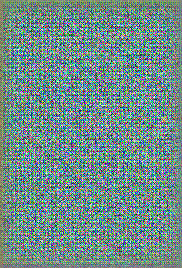

In [11]:
from networks import Generator

G = Generator(100, 28)
one_hot = torch.zeros(1, 28)
one_hot[0][25] = 1
G.generate_poster(one_hot)